<a href="https://colab.research.google.com/github/Mukesh2806/Reelsense-Movie-Recommendation-System/blob/main/MovieRecommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554961 sha256=9d7de6076997a9b3b7aab069c8a571a027624179ab2c63e80e44c7899ac0ab09
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [2]:
!pip uninstall -y numpy scikit-surprise
!pip install "numpy<2" scikit-surprise

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
  Using cached scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 77.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which i

In [3]:
from google.colab import files
upload1=files.upload()
upload2=files.upload()
upload3=files.upload()
upload4=files.upload()

Saving links.csv to links.csv


Saving movies.csv to movies.csv


Saving ratings.csv to ratings.csv


Saving tags.csv to tags.csv


In [1]:
import pandas as pd
links=pd.read_csv('links.csv')
ratings=pd.read_csv('ratings.csv')
movies=pd.read_csv('movies.csv')
tags=pd.read_csv('tags.csv')

***PREPROCESSING***

1.Cleaning the dataset

In [2]:
genre= movies['genres'].str.get_dummies(sep='|')
movie_genres=pd.concat([movies[['movieId', 'title']], genre], axis=1)
print(f"Unique Genres found: {genre.columns.tolist()}")
movie_genres.head()

Unique Genres found: ['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
genre_matrix = movies['genres'].str.get_dummies(sep='|')
if '(no genres listed)' in genre_matrix.columns:
    genre_matrix = genre_matrix.rename(columns={'(no genres listed)': 'Unknown_Genre'})
cleaned = pd.concat([movies[['movieId', 'title']], genre_matrix], axis=1)

In [4]:
import re

def clean_tag(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text.strip()
tags['tag'] = tags['tag'].apply(clean_tag)
movie_tags= tags.groupby('movieId')['tag'].apply(lambda x:' '.join(x)).reset_index()

2.Parsing Timestamp to Datetime

In [5]:
ratings['timestamp']=pd.to_datetime(ratings['timestamp'],unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


3.Training and Testing

In [6]:
ratings = ratings.sort_values(by=['userId', 'timestamp'])
test = ratings.groupby('userId').tail(10)

train = ratings.drop(test.index)

print(f"Total Ratings: {len(ratings)}")
print(f"Train Set: {len(train)}")
print(f"Test Set: {len(test)}")

Total Ratings: 100836
Train Set: 94736
Test Set: 6100


***EDA***

/tmp/ipython-input-1090195482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating',data=ratings,palette='flare')


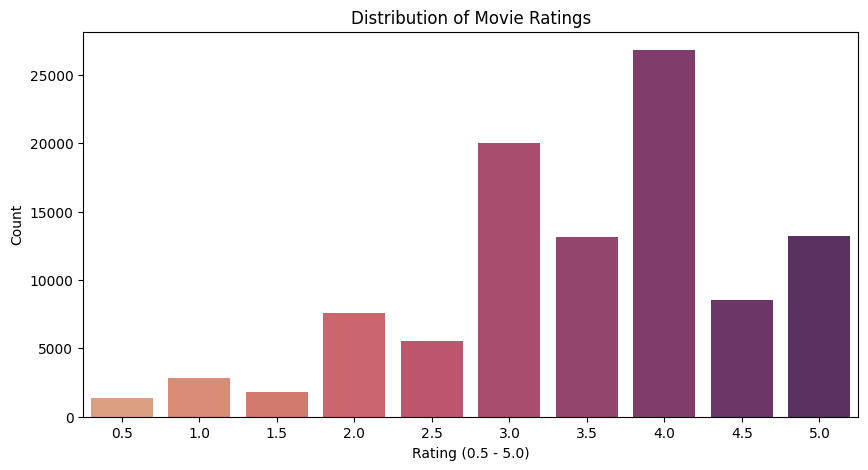

Average Rating across dataset: 3.50


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x='rating',data=ratings,palette='flare')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (0.5 - 5.0)')
plt.ylabel('Count')
plt.show()

print(f"Average Rating across dataset: {ratings['rating'].mean():.2f}")

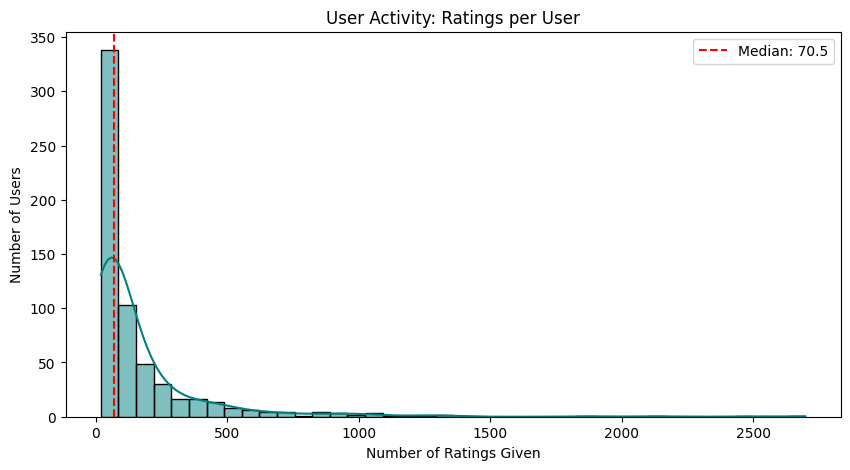

In [8]:
user_count = ratings.groupby('userId').size()
plt.figure(figsize=(10, 5))
sns.histplot(user_count, bins=40, kde=True, color='teal')
plt.title('User Activity: Ratings per User')
plt.xlabel('Number of Ratings Given')
plt.ylabel('Number of Users')
plt.axvline(user_count.median(),color='red', linestyle='--', label=f'Median: {user_count.median()}')
plt.legend()
plt.show()

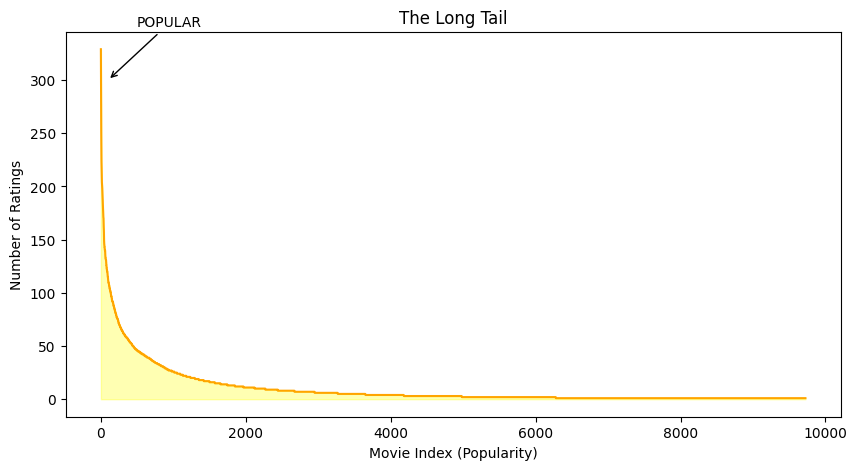

In [9]:
popularity=ratings.groupby('movieId').size().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.plot(range(len(popularity)),popularity.values, color='orange')
plt.fill_between(range(len(popularity)),popularity.values, color='yellow', alpha=0.3)
plt.title('The Long Tail')
plt.xlabel('Movie Index (Popularity)')
plt.ylabel('Number of Ratings')
plt.annotate('POPULAR',xy=(100, 300), xytext=(500, 350), arrowprops=dict(arrowstyle='->'))
plt.show()

/tmp/ipython-input-1813043734.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genre', y='Total_Ratings', data=genre_summary, ax=ax1, alpha=0.6, palette='magma')
/tmp/ipython-input-1813043734.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


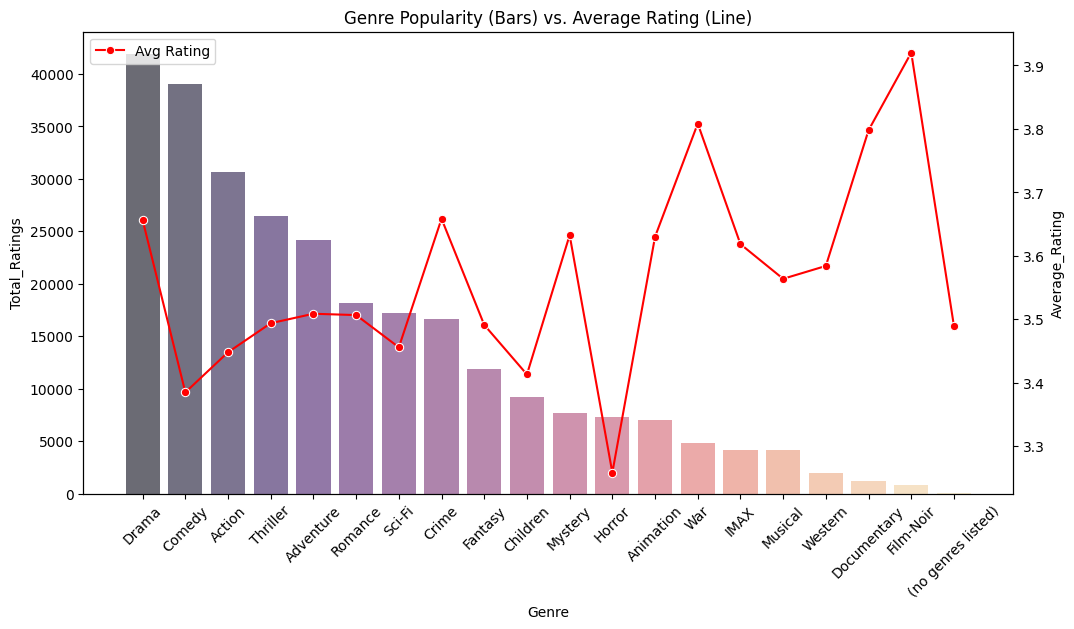

In [10]:
exploded = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')
genre_stats = pd.merge(exploded, ratings, on='movieId')

genre_summary = genre_stats.groupby('genres').agg({'rating': ['mean', 'count']}).reset_index()
genre_summary.columns = ['Genre', 'Average_Rating', 'Total_Ratings']
genre_summary = genre_summary.sort_values(by='Total_Ratings', ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

sns.barplot(x='Genre', y='Total_Ratings', data=genre_summary, ax=ax1, alpha=0.6, palette='magma')
sns.lineplot(x='Genre', y='Average_Rating', data=genre_summary, ax=ax2, color='red', marker='o', label='Avg Rating')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Genre Popularity (Bars) vs. Average Rating (Line)')
plt.show()

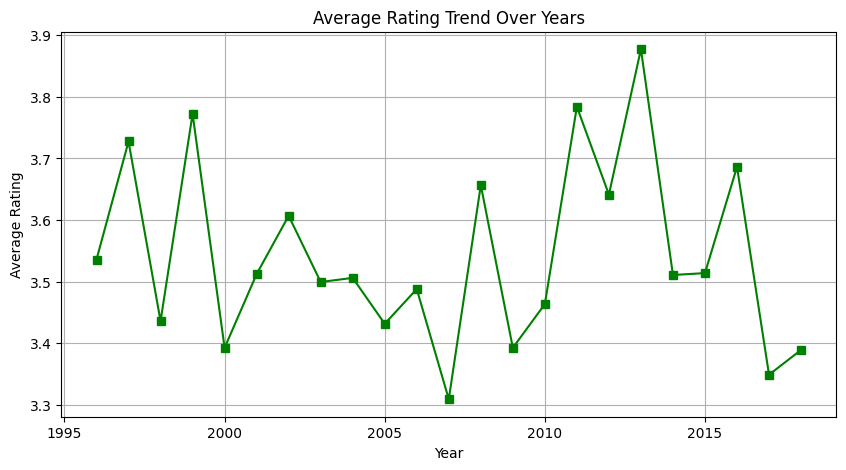

In [14]:
ratings['year'] = ratings['timestamp'].dt.year
yearly_avg = ratings.groupby('year')['rating'].mean()

plt.figure(figsize=(10, 5))
yearly_avg.plot(kind='line', marker='s', color='green')
plt.title('Average Rating Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

***MODEL TRAINING***

In [ ]:
popularity_stats = train.groupby('movieId').agg({'rating': ['mean', 'count']})
popularity_stats.columns = ['avg_rating', 'vote_count']

min_votes = 50
popular_movies = popularity_stats[popularity_stats['vote_count'] >= min_votes]
popular_movies = popular_movies.sort_values(by='avg_rating', ascending=False)

top10=popular_movies.head(10).merge(movies[['movieId', 'title']], on='movieId')
print("Top 10 Popular Baseline Movies:")
print(top10[['title', 'avg_rating']])

Top 10 Popular Baseline Movies:
                                               title  avg_rating
0                   Shawshank Redemption, The (1994)    4.414089
1                              Godfather, The (1972)    4.304598
2  Dr. Strangelove or: How I Learned to Stop Worr...    4.268817
3                                  Fight Club (1999)    4.257426
4                                   Chinatown (1974)    4.254545
5                               Departed, The (2006)    4.244792
6                              Cool Hand Luke (1967)    4.240741
7                                  Casablanca (1942)    4.239583
8                                     Amadeus (1984)    4.239130
9                     Godfather: Part II, The (1974)    4.235537


In [15]:
import pandas as pd
from surprise import SVD, Dataset, Reader
train_sub=train[['userId', 'movieId', 'rating']].copy()
train_sub['userId'] = train_sub['userId'].astype(int)
train_sub['movieId'] = train_sub['movieId'].astype(int)
train_sub['rating'] = train_sub['rating'].astype(float)

reader=Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df(train_sub, reader)

trainset = data.build_full_trainset()
model = SVD(n_factors=100, n_epochs=15,random_state=42)
model.fit(trainset)

print("SVD trained completely")

SVD trained completely


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

def generate_similarity_matrix(df, col_name='genres'):
    df[col_name] = df[col_name].fillna('')

    text_data = df[col_name].apply(lambda x: str(x).replace('|', ' '))

    vectorizer = TfidfVectorizer(stop_words='english')
    matrix_tfidf = vectorizer.fit_transform(text_data)

    sim_matrix = linear_kernel(matrix_tfidf, matrix_tfidf)

    df.reset_index(drop=True, inplace=True)

    return sim_matrix, df

cosine_sim, movies = generate_similarity_matrix(movies)

In [29]:
def recommendations(user_id,n=10,x=0.8):
    seen=train[train['userId']==user_id]['movieId'].tolist()
    all_movies=movies['movieId'].unique().tolist()
    unseen=[m for m in all_movies if m not in seen]
    history=train[train['userId']==user_id].sort_values(by='rating',ascending=False)
    top=history.iloc[0]['movieId'] if not history.empty else None
    scores=[]
    for m in unseen:
        svd_score=model.predict(user_id, m).est
        similarity=0
        if top is not None:
            try:
                idx_anchor = movies[movies['movieId'] == top].index[0]
                idx_candidate = movies[movies['movieId'] == m].index[0]
                similarity=cosine_sim[idx_anchor][idx_candidate]*5
            except:
                similarity=0
        final=(x*svd_score)+((1-x) * similarity)
        scores.append((m,final))

    scores.sort(key=lambda x:x[1],reverse=True)

    return scores[:n]

***Evaluation Metrics of The Model***

In [31]:
import numpy as np
import math
import random

class HybridEvaluator:
    def __init__(self, train_df, test_df, movies_df, svd_model, cosine_sim_matrix):
        """
        Evaluator for the SVD + Cosine Hybrid model.
        """
        self.train_df = train_df
        self.test_df = test_df
        self.movies_df = movies_df
        self.model = svd_model
        self.cosine_sim = cosine_sim_matrix

    def _predict_hybrid_score(self, user_id, movie_id, x=0.8):
        try:
            svd_est = self.model.predict(user_id, movie_id).est
        except:
            svd_est = 3.0
        user_history = self.train_df[self.train_df['userId'] == user_id].sort_values(by='rating', ascending=False)

        similarity_score = 0
        if not user_history.empty:
            top_movie_id = user_history.iloc[0]['movieId']
            try:
                idx_anchor = self.movies_df[self.movies_df['movieId'] == top_movie_id].index[0]
                idx_target = self.movies_df[self.movies_df['movieId'] == movie_id].index[0]

                similarity_score = self.cosine_sim[idx_anchor][idx_target] * 5
            except (IndexError, KeyError):
                similarity_score = 0

        # 3. Weighted Hybrid
        final_score = (x * svd_est) + ((1 - x) * similarity_score)
        return final_score

    def evaluate_accuracy(self, x_weight=0.8):
        """
        Calculates RMSE and MAE on the Test Set.
        """
        errors = []
        abs_errors = []

        test_data = self.test_df[['userId', 'movieId', 'rating']].values

        for uid, mid, actual_rating in test_data:
            predicted = self._predict_hybrid_score(uid, mid, x=x_weight)

            # Squared Error for RMSE
            errors.append((actual_rating - predicted) ** 2)
            # Absolute Error for MAE
            abs_errors.append(abs(actual_rating - predicted))

        rmse = np.sqrt(np.mean(errors))
        mae = np.mean(abs_errors)

        return {"RMSE": round(rmse, 4), "MAE": round(mae, 4)}

    def evaluate_ranking(self, n_recommendations=10, x_weight=0.8, sample_users=50):
        """
        Calculates Precision@K and Recall@K.
        WARNING: Generates recommendations for a sample of users (slow operation).
        """
        unique_test_users = self.test_df['userId'].unique()

        if len(unique_test_users) > sample_users:
            sampled_users = np.random.choice(unique_test_users, sample_users, replace=False)
        else:
            sampled_users = unique_test_users

        precisions = []
        recalls = []

        print(f"Generating recommendations for {len(sampled_users)} users...")

        for uid in sampled_users:

            user_test_data = self.test_df[self.test_df['userId'] == uid]
            relevant_items = set(user_test_data[user_test_data['rating'] >= 3.5]['movieId'])

            if len(relevant_items) == 0:
                continue

            recs_list = recommendations(uid, n=n_recommendations, x=x_weight)
            rec_ids = [r[0] for r in recs_list]

            hits = sum([1 for item in rec_ids if item in relevant_items])

            precisions.append(hits / n_recommendations)
            recalls.append(hits / len(relevant_items))

        return {
            f"Precision@{n_recommendations}": round(np.mean(precisions), 4),
            f"Recall@{n_recommendations}": round(np.mean(recalls), 4)
        }

train_data = train.sample(frac=0.8, random_state=42)
test_data = train.drop(train_data.index)

eval_obj = HybridEvaluator(train_data, test_data, movies, model,cosine_sim)

print("Calculating Error Metrics...")
acc_metrics = eval_obj.evaluate_accuracy(x_weight=0.8)
print("Accuracy:", acc_metrics)

print("\nCalculating Ranking Metrics (Sampled)...")
rank_metrics = eval_obj.evaluate_ranking(n_recommendations=10, x_weight=0.8, sample_users=20)
print("Ranking:", rank_metrics)

Calculating Error Metrics...
Accuracy: {'RMSE': 0.9154, 'MAE': 0.7592}

Calculating Ranking Metrics (Sampled)...
Generating recommendations for 20 users...
Ranking: {'Precision@10': 0.0, 'Recall@10': 0.0}


Generate Explaination based on the trained model

In [21]:
def user_input(user_id,movie_id):
    user_favs = train[train['userId'] == user_id].sort_values(by='rating', ascending=False)
    if user_favs.empty:
        return "Based on popular trends among all users."

    fav_id = user_favs.iloc[0]['movieId']
    fav_title = movies[movies['movieId'] == fav_id]['title'].values[0]
    rec_title = movies[movies['movieId'] == movie_id]['title'].values[0]

    genres_fav = set(movies[movies['movieId'] == fav_id]['genres'].iloc[0].split('|'))
    genres_rec = set(movies[movies['movieId'] == movie_id]['genres'].iloc[0].split('|'))
    common = list(genres_fav.intersection(genres_rec))

    if common and "(no genres listed)" not in common:
        explanation = f"Because you liked '{fav_title}', which shares themes like {', '.join(common[:2])}."
    else:
        explanation = f"We think you'll enjoy this based on users with tastes similar to yours."

    return explanation

user_id_test = 34
recommend = recommendations(user_id=user_id_test, n=5)

print(f"--- Top 5 Recommendations for User {user_id_test} ---")
for m, score in recommend:
    title = movies[movies['movieId'] == m]['title'].values[0]
    print(f"MOVIE: {title} (Score: {score:.2f})")
    print(f"DO YOU KNOW WHY ??? {user_input(user_id_test, m)}")
    print("-" * 30)

--- Top 5 Recommendations for User 34 ---
MOVIE: Bridge on the River Kwai, The (1957) (Score: 3.53)
DO YOU KNOW WHY ??? Because you liked 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', which shares themes like Drama.
------------------------------
MOVIE: One Flew Over the Cuckoo's Nest (1975) (Score: 3.46)
DO YOU KNOW WHY ??? Because you liked 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', which shares themes like Drama.
------------------------------
MOVIE: High Noon (1952) (Score: 3.44)
DO YOU KNOW WHY ??? Because you liked 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', which shares themes like Drama.
------------------------------
MOVIE: Army of Darkness (1993) (Score: 3.43)
DO YOU KNOW WHY ??? Because you liked 'Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)', which shares themes like Action.
------------------------------
MOVIE: Taxi Driver (1976) (Score: 3.42)
DO YOU KNOW WHY ??? Because you liked 'Crouching Tiger, Hidden Dragon (Wo hu